# Import packages

In [8]:
import pandas as pd


In [9]:
import plotly.express as px

In [10]:
import matplotlib.pyplot as plt

In [11]:
import seaborn as sns

In [12]:
import json

# Upload the data into a DataFrame

Note : les donnees utilisees datent du 18.01.2024

In [13]:
with open('/content/data_search.json', 'r') as f:
  content = json.load(f)

In [14]:
df = pd.DataFrame(content)

# Explorations

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49990 entries, 0 to 49989
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     49990 non-null  object 
 1   type                     49990 non-null  object 
 2   url                      49990 non-null  object 
 3   global_id                3662 non-null   object 
 4   description              28475 non-null  object 
 5   published_at             49990 non-null  object 
 6   publisher                3662 non-null   object 
 7   citationHtml             3662 non-null   object 
 8   identifier_of_dataverse  3662 non-null   object 
 9   name_of_dataverse        3662 non-null   object 
 10  citation                 3662 non-null   object 
 11  storageIdentifier        3662 non-null   object 
 12  subjects                 3662 non-null   object 
 13  fileCount                3662 non-null   float64
 14  versionId             

In [16]:
df['type'].value_counts()

file         45580
dataset       3662
dataverse      748
Name: type, dtype: int64

In [17]:
df.columns

Index(['name', 'type', 'url', 'global_id', 'description', 'published_at',
       'publisher', 'citationHtml', 'identifier_of_dataverse',
       'name_of_dataverse', 'citation', 'storageIdentifier', 'subjects',
       'fileCount', 'versionId', 'versionState', 'majorVersion',
       'minorVersion', 'createdAt', 'updatedAt', 'contacts', 'publications',
       'geographicCoverage', 'authors', 'file_id', 'file_type',
       'file_content_type', 'size_in_bytes', 'md5', 'checksum',
       'file_persistent_id', 'dataset_name', 'dataset_id',
       'dataset_persistent_id', 'dataset_citation', 'unf', 'keywords',
       'producers', 'dataSources', 'relatedMaterial', 'identifier'],
      dtype='object')

**columns they all have** : 'name', 'type', 'url', 'description'

 **only file have :** 'file_id', 'file_type', 'file_content_type' 'size_in_bytes', 'md5', 'checksum',   'file_persistent_id', 'dataset_name', 'dataset_id', 'dataset_persistent_id', 'dataset_citation'

**only dataset have :** 'global_id', 'publisher', 'citationHtml', 'identifier_of_dataverse', 'name_of_dataverse', 'citation', 'storageIdentifier', 'subjects', 'fileCount', 'versionId', 'versionState', 'createdAt', 'updatedAt', 'contacts', 'authors'

**only dataverse have :** 'identifier'

**mixed between the types (TBD) :**   'description', 'majorVersion', 'minorVersion', 'publications','geographicCoverage', 'unf', 'keywords', 'producers', 'dataSources', 'relatedMaterial',

# Description analysis

In [18]:
df_description = df[df['description'].notna()]

In [19]:
df_description['type'].value_counts()

file         24273
dataset       3662
dataverse      540
Name: type, dtype: int64

In [20]:
# all the datasets have a description

In [21]:
df_description['descr_len'] = df_description['description'].str.len()

<ipython-input-21-07eac87c3ab7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_description['descr_len'] = df_description['description'].str.len()


In [22]:
df_description[df_description['descr_len'] == 0]

name  type  \
5      MET-2018-P13-CM_SOP for LCMS metabolomics prof...  file   
11     MET-2018-P13-CM_LCMS_SOP for LCMS metabolomics...  file   
153                                PO4_100km_Borders.zip  file   
154                              PO4_100km_NoBorders.zip  file   
155                                 PO4_35km_Borders.zip  file   
...                                                  ...   ...   
48044               vlcsnap-2021-09-26-22h40m20s039.tiff  file   
48045               vlcsnap-2021-09-26-22h48m29s499.tiff  file   
48046               vlcsnap-2021-09-26-22h50m47s036.tiff  file   
48155                      Ghislain_et_al_2019_AFS_f.csv  file   
48734  new_template_TEMPO_FORET_v24_FR_light_cm_deb2_...  file   

                                                     url global_id  \
5      https://entrepot.recherche.data.gouv.fr/api/ac...       NaN   
11     https://entrepot.recherche.data.gouv.fr/api/ac...       NaN   
153    https://entrepot.recherche.data.gouv.fr/api/ac...       NaN   
154    https://entrepot.recherche.data.gouv.fr/api/ac...       NaN   
155    https://entrepot.recherche.data.gouv.fr/api/ac...       NaN   
...                                                  ...       ...   
48044  https://entrepot.recherche.data.gouv.fr/api/ac...       NaN   
48045  https://entrepot.recherche.data.gouv.fr/api/ac...       NaN   
48046  https://entrepot.recherche.data.gouv.fr/api/ac...       NaN   
48155  https://entrepot.recherche.data.gouv.fr/api/ac...       NaN   
48734  https://entrepot.recherche.data.gouv.fr/api/ac...       NaN   

      description          published_at publisher citationHtml  \
5                  2020-07-03T15:04:19Z       NaN          NaN   
11                 2020-07-02T08:32:21Z       NaN          NaN   
153                2019-11-28T15:39:43Z       NaN          NaN   
154                2019-11-28T15:39:43Z       NaN          NaN   
155                2019-11-28T15:39:43Z       NaN          NaN   
...           ...                   ...       ...          ...   
48044              2022-10-26T13:55:46Z       NaN          NaN   
48045              2022-10-26T13:55:46Z       NaN          NaN   
48046              2022-10-26T13:55:46Z       NaN          NaN   
48155              2019-12-13T09:07:36Z       NaN          NaN   
48734              2024-01-18T12:46:06Z       NaN          NaN   

      identifier_of_dataverse name_of_dataverse  ... dataset_id  \
5                         NaN               NaN  ...     100017   
11                        NaN               NaN  ...     100007   
153                       NaN               NaN  ...      95753   
154                       NaN               NaN  ...      95753   
155                       NaN               NaN  ...      95753   
...                       ...               ...  ...        ...   
48044                     NaN               NaN  ...     142691   
48045                     NaN               NaN  ...     142691   
48046                     NaN               NaN  ...     142691   
48155                     NaN               NaN  ...      94939   
48734                     NaN               NaN  ...     186084   

      dataset_persistent_id  \
5       doi:10.15454/IFPJAP   
11      doi:10.15454/YVKQRW   
153     doi:10.15454/OIXOMR   
154     doi:10.15454/OIXOMR   
155     doi:10.15454/OIXOMR   
...                     ...   
48044   doi:10.57745/QN7MMM   
48045   doi:10.57745/QN7MMM   
48046   doi:10.57745/QN7MMM   
48155   doi:10.15454/DU1O18   
48734   doi:10.57745/IILOZT   

                                        dataset_citation  unf  keywords  \
5      Bernillon, Stéphane, 2020, "Positive mode LC-M...  NaN       NaN   
11     Bernillon, Stéphane, 2020, "Negative mode LC-M...  NaN       NaN   
153    Vrebos, Dirk; Bampa, Francesca; Schulte, Rogie...  NaN       NaN   
154    Vrebos, Dirk; Bampa, Francesca; Schulte, Rogie...  NaN       NaN   
155    Vrebos, Dirk; Bampa, Francesca; Schulte, Rogie...  NaN       NaN 

In [23]:
df_description['descr_len'].value_counts()

0       16534
18        196
240       169
46        147
22        140
        ...  
884         1
1349        1
2573        1
1019        1
1674        1
Name: descr_len, Length: 1691, dtype: int64

In [24]:
df_description_1 = df_description[df_description['descr_len'] != 0]

In [25]:
df_description_1['type'].value_counts()

file         7739
dataset      3662
dataverse     540
Name: type, dtype: int64

In [26]:
df_description_1['descr_len'].value_counts()

18      196
240     169
46      147
22      140
7       127
       ... 
884       1
1349      1
2573      1
1019      1
1674      1
Name: descr_len, Length: 1690, dtype: int64

In [27]:
df_description_1['descr_len'].describe()

count    11941.000000
mean       342.816850
std        717.204782
min          1.000000
25%         46.000000
50%        105.000000
75%        294.000000
max      12865.000000
Name: descr_len, dtype: float64

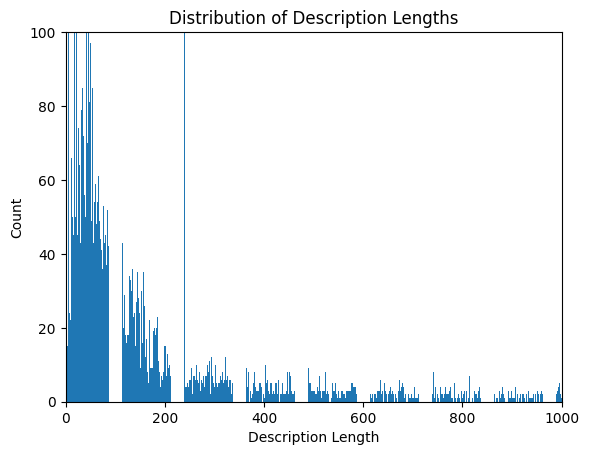

In [28]:
# Plot the value counts
plt.bar(df_description_1['descr_len'].value_counts().index, df_description_1['descr_len'].value_counts().values)
# Set the x-axis limits (adjust these values as needed)
plt.xlim(0, 1000)

# Set the y-axis limits (adjust these values as needed)
plt.ylim(0, 100)
plt.xlabel('Description Length')
plt.ylabel('Count')
plt.title('Distribution of Description Lengths')
plt.show()


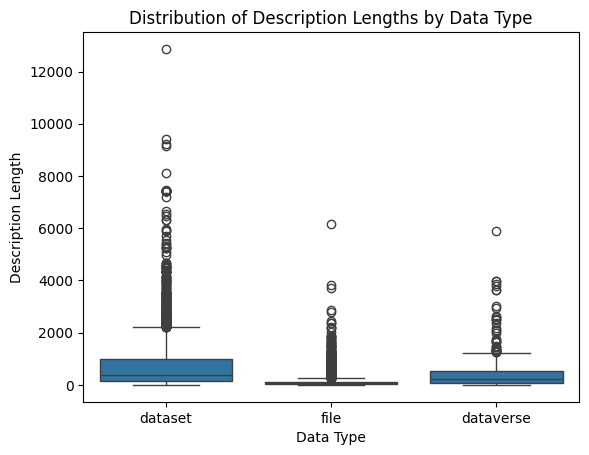

In [29]:
# Create a boxplot using Seaborn
sns.boxplot(x='type', y='descr_len', data=df_description_1)

plt.xlabel('Data Type')
plt.ylabel('Description Length')
plt.title('Distribution of Description Lengths by Data Type')
plt.show()

# Keywords analysis

In [30]:
df_keywords = df[df['keywords'].notna()]

In [31]:
df_keywords['type'].value_counts()

dataset    2622
Name: type, dtype: int64

In [32]:
df_description_1['keywords'].count()

2622

The only documents with keywords are datasets.

# Date analysis

In [33]:
df.head(10)

name     type  \
0  Positive mode LC-MS metabolomics of tomato fru...  dataset   
1         MET-2018-P13-CM_LCMS_annotation_table.xlsx     file   
2                   MET-2018-P13-CM_LCMS_pos_data.7z     file   
3  MET-2018-P13-CM_LCMS_pos_DWnorm_MSDIAL_output_...     file   
4  MET-2018-P13-CM_LCMS_pos_MSDIAL_Parameters_4_2...     file   
5  MET-2018-P13-CM_SOP for LCMS metabolomics prof...     file   
6  Negative mode LC-MS metabolomics of tomato fru...  dataset   
7  MET-2018-P13-CM_DWnorm_MSDIAL_output_Normalize...     file   
8        MET-2018-P13-CM_LCMS_ annotation_table.xlsx     file   
9              MET-2018-P13-CM_LCMS_neg_ abf_data.7z     file   

                                                 url            global_id  \
0                    https://doi.org/10.15454/IFPJAP  doi:10.15454/IFPJAP   
1  https://entrepot.recherche.data.gouv.fr/api/ac...                  NaN   
2  https://entrepot.recherche.data.gouv.fr/api/ac...                  NaN   
3  https://entrepot.recherche.data.gouv.fr/api/ac...                  NaN   
4  https://entrepot.recherche.data.gouv.fr/api/ac...                  NaN   
5  https://entrepot.recherche.data.gouv.fr/api/ac...                  NaN   
6                    https://doi.org/10.15454/YVKQRW  doi:10.15454/YVKQRW   
7  https://entrepot.recherche.data.gouv.fr/api/ac...                  NaN   
8  https://entrepot.recherche.data.gouv.fr/api/ac...                  NaN   
9  https://entrepot.recherche.data.gouv.fr/api/ac...                  NaN   

                                         description          published_at  \
0  Positive mode LC-MS metabolomic profiling of 1...  2020-07-03T15:04:19Z   
1                        List of annotated variables  2020-07-03T15:04:19Z   
2  48 negative mode LC-MS acquisitions of samples...  2020-07-03T15:04:19Z   
3  Data output from MSDIAL software with an addit...  2020-07-03T15:04:19Z   
4                  used parameters with MSDial v3.66  2020-07-03T15:04:19Z   
5                                                     2020-07-03T15:04:19Z   
6  Negative mode LC-MS metabolomic profiling of 1...  2020-07-02T08:32:21Z   
7  Data output from MSDIAL software with an addit...  2020-07-02T08:32:21Z   
8                        List of annotated variables  2020-07-02T08:32:21Z   
9  48 negative mode LC-MS acquisitions of samples...  2020-07-02T08:32:21Z   

                                           publisher  \
0  Metabolome of tomato fruit pericarp of gbp1-c ...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5                                                NaN   
6  Metabolome of tomato fruit pericarp of gbp1-c ...   
7                                                NaN   
8                                                NaN   
9                                                NaN   

                                        citationHtml identifier_of_dataverse  \
0  Bernillon, St&eacute;phane, 2020, "Positive mo...                 Sl-gbp1   
1                                                NaN                     NaN   
2                                                NaN                     NaN   
3                                                NaN                     NaN   
4                                                NaN                     NaN   
5                                                NaN                     NaN   
6  Bernillon, St&eacute;phane, 2020, "Negative mo...                 Sl-gbp1   
7                                                NaN                     NaN   
8                                                NaN                     NaN   
9                                                NaN                     NaN   

                                   name_of_dataverse  ...  \
0  Metabolome of tomato fruit pericarp of gbp1-c ...  ...   
1    

In [34]:
df['published_at'] = pd.to_datetime(df['published_at'])

In [35]:
df['published_at']

0       2020-07-03 15:04:19+00:00
1       2020-07-03 15:04:19+00:00
2       2020-07-03 15:04:19+00:00
3       2020-07-03 15:04:19+00:00
4       2020-07-03 15:04:19+00:00
                   ...           
49985   2023-12-06 01:00:04+00:00
49986   2023-12-07 01:00:04+00:00
49987   2023-12-14 01:00:03+00:00
49988   2024-01-17 01:00:15+00:00
49989   2024-01-17 01:00:15+00:00
Name: published_at, Length: 49990, dtype: datetime64[ns, UTC]

In [36]:
df['year_month'] = df['published_at'].dt.to_period('M')

df['year'] = df['published_at'].dt.year

<ipython-input-36-6967eab366df>:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['published_at'].dt.to_period('M')


In [37]:
df.groupby(df['year'])['description'].nunique()

year
2018     231
2019     542
2020     993
2021    2126
2022    2304
2023    4085
2024     156
Name: description, dtype: int64

In [38]:
df.groupby(df['year'])['name'].nunique()

year
2018      927
2019     4327
2020     3954
2021     6184
2022    11922
2023    17995
2024     1106
Name: name, dtype: int64

In [39]:
filtered_df = df[df['type'] == 'dataset']

# Perform groupby and count the unique names
result = filtered_df.groupby('year')['name'].nunique()
result

year
2018      64
2019     145
2020     309
2021     743
2022     743
2023    1586
2024      64
Name: name, dtype: int64

In [40]:
df_description_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11941 entries, 0 to 49989
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     11941 non-null  object 
 1   type                     11941 non-null  object 
 2   url                      11941 non-null  object 
 3   global_id                3662 non-null   object 
 4   description              11941 non-null  object 
 5   published_at             11941 non-null  object 
 6   publisher                3662 non-null   object 
 7   citationHtml             3662 non-null   object 
 8   identifier_of_dataverse  3662 non-null   object 
 9   name_of_dataverse        3662 non-null   object 
 10  citation                 3662 non-null   object 
 11  storageIdentifier        3662 non-null   object 
 12  subjects                 3662 non-null   object 
 13  fileCount                3662 non-null   float64
 14  versionId             

In [41]:
df_description_1['published_at']

0        2020-07-03T15:04:19Z
1        2020-07-03T15:04:19Z
2        2020-07-03T15:04:19Z
3        2020-07-03T15:04:19Z
4        2020-07-03T15:04:19Z
                 ...         
49985    2023-12-06T01:00:04Z
49986    2023-12-07T01:00:04Z
49987    2023-12-14T01:00:03Z
49988    2024-01-17T01:00:15Z
49989    2024-01-17T01:00:15Z
Name: published_at, Length: 11941, dtype: object

In [42]:
df_description_1['published_at'] = pd.to_datetime(df_description_1['published_at'])

<ipython-input-42-0030c949ae2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_description_1['published_at'] = pd.to_datetime(df_description_1['published_at'])


In [43]:
df_description_1['year'] = df_description_1['published_at'].dt.year

<ipython-input-43-ad1fa6f9fadc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_description_1['year'] = df_description_1['published_at'].dt.year


In [44]:
df_description_1.groupby(df_description_1['year'])['description'].nunique()

year
2018     231
2019     541
2020     992
2021    2125
2022    2303
2023    4084
2024     155
Name: description, dtype: int64

In [45]:
filtered_df_descr = df_description_1[df_description_1['type'] == 'dataset']

# Perform groupby and count the unique names
result = filtered_df_descr.groupby('year')['name'].nunique()
result

year
2018      64
2019     145
2020     309
2021     743
2022     743
2023    1586
2024      64
Name: name, dtype: int64

In [46]:
descr_year_type = df_description_1.groupby(['year', 'type'])['description'].nunique()

In [47]:
general_year_type = df.groupby(['year', 'type'])['name'].nunique()

In [48]:
df_year_type = pd.DataFrame(general_year_type)

In [50]:
df_desc_y_t = pd.DataFrame(descr_year_type)

In [52]:
df_year_type['with_description'] = df_desc_y_t['description']

In [58]:
df_year_type['description_score'] =  (df_year_type['with_description'] / df_year_type['name'])*100

In [59]:
df_year_type

name  with_description  description_score
year type                                                 
2018 dataset       64                59          92.187500
     dataverse     67                70         104.477612
     file         796               103          12.939698
2019 dataset      145               145         100.000000
     dataverse     26                21          80.769231
     file        4156               376           9.047161
2020 dataset      309               280          90.614887
     dataverse     68                46          67.647059
     file        3577               671          18.758736
2021 dataset      743               741          99.730821
     dataverse     67                39          58.208955
     file        5374              1349          25.102345
2022 dataset      743               741          99.730821
     dataverse    201               113          56.218905
     file       10980              1451          13.214936
2023 dataset     1586              1539          97.036570
     dataverse    281               218          77.580071
     file       16129              2328          14.433629
2024 dataset       64                64         100.000000
     dataverse     23                23         100.000000
     file        1019                68           6.673209

In [ ]:
df_keywords['published_at'] = pd.to_datetime(df_keywords['published_at'])

In [ ]:
df_keywords['year'] = df_keywords['published_at'].dt.year

In [69]:
df_keywords = pd.DataFrame(df_keywords)

In [ ]:
df_keywords['keywords'].count()

In [78]:
keywords_year_type = df_keywords.groupby(['year', 'type'])['keywords'].count()

In [79]:
df_kw_y_t = pd.DataFrame(keywords_year_type)

In [80]:
df_kw_y_t

keywords
year type             
2018 dataset        37
2019 dataset        39
2020 dataset       138
2021 dataset       503
2022 dataset       575
2023 dataset      1292
2024 dataset        38

In [81]:
df_year_type['with_keywords'] = df_kw_y_t['keywords']

In [82]:
df_year_type['keywords_score'] = (df_year_type['with_keywords'] / df_year_type['name'] ) * 100

In [83]:
df_year_type

name  with_description  description_score  with_keywords  \
year type                                                                   
2018 dataset       64                59          92.187500           37.0   
     dataverse     67                70         104.477612            NaN   
     file         796               103          12.939698            NaN   
2019 dataset      145               145         100.000000           39.0   
     dataverse     26                21          80.769231            NaN   
     file        4156               376           9.047161            NaN   
2020 dataset      309               280          90.614887          138.0   
     dataverse     68                46          67.647059            NaN   
     file        3577               671          18.758736            NaN   
2021 dataset      743               741          99.730821          503.0   
     dataverse     67                39          58.208955            NaN   
     file        5374              1349          25.102345            NaN   
2022 dataset      743               741          99.730821          575.0   
     dataverse    201               113          56.218905            NaN   
     file       10980              1451          13.214936            NaN   
2023 dataset     1586              1539          97.036570         1292.0   
     dataverse    281               218          77.580071            NaN   
     file       16129              2328          14.433629            NaN   
2024 dataset       64                64         100.000000           38.0   
     dataverse     23                23         100.000000            NaN   
     file        1019                68           6.673209            NaN   

                keywords_score  
year type                       
2018 dataset         57.812500  
     dataverse             NaN  
     file                  NaN  
2019 dataset         26.896552  
     dataverse             NaN  
     file                  NaN  
2020 dataset         44.660194  
     dataverse             NaN  
     file                  NaN  
2021 dataset         67.698520  
     dataverse             NaN  
     file                  NaN  
2022 dataset         77.388964  
     dataverse             NaN  
     file                  NaN  
2023 dataset         81.462799  
     dataverse             NaN  
     file                  NaN  
2024 dataset         59.375000  
     dataverse             NaN  
     file                  NaN

In [85]:
df_year_type.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 21 entries, (2018, 'dataset') to (2024, 'file')
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               21 non-null     int64  
 1   with_description   21 non-null     int64  
 2   description_score  21 non-null     float64
 3   with_keywords      7 non-null      float64
 4   keywords_score     7 non-null      float64
dtypes: float64(3), int64(2)
memory usage: 1.0+ KB


In [86]:
df_year_type['score'] = (df_year_type['description_score'] + df_year_type['keywords_score'])/2

In [87]:
df_year_type

name  with_description  description_score  with_keywords  \
year type                                                                   
2018 dataset       64                59          92.187500           37.0   
     dataverse     67                70         104.477612            NaN   
     file         796               103          12.939698            NaN   
2019 dataset      145               145         100.000000           39.0   
     dataverse     26                21          80.769231            NaN   
     file        4156               376           9.047161            NaN   
2020 dataset      309               280          90.614887          138.0   
     dataverse     68                46          67.647059            NaN   
     file        3577               671          18.758736            NaN   
2021 dataset      743               741          99.730821          503.0   
     dataverse     67                39          58.208955            NaN   
     file        5374              1349          25.102345            NaN   
2022 dataset      743               741          99.730821          575.0   
     dataverse    201               113          56.218905            NaN   
     file       10980              1451          13.214936            NaN   
2023 dataset     1586              1539          97.036570         1292.0   
     dataverse    281               218          77.580071            NaN   
     file       16129              2328          14.433629            NaN   
2024 dataset       64                64         100.000000           38.0   
     dataverse     23                23         100.000000            NaN   
     file        1019                68           6.673209            NaN   

                keywords_score      score  
year type                                  
2018 dataset         57.812500  75.000000  
     dataverse             NaN        NaN  
     file                  NaN        NaN  
2019 dataset         26.896552  63.448276  
     dataverse             NaN        NaN  
     file                  NaN        NaN  
2020 dataset         44.660194  67.637540  
     dataverse             NaN        NaN  
     file                  NaN        NaN  
2021 dataset         67.698520  83.714670  
     dataverse             NaN        NaN  
     file                  NaN        NaN  
2022 dataset         77.388964  88.559892  
     dataverse             NaN        NaN  
     file                  NaN        NaN  
2023 dataset         81.462799  89.249685  
     dataverse             NaN        NaN  
     file                  NaN        NaN  
2024 dataset         59.375000  79.687500  
     dataverse             NaN        NaN  
     file                  NaN        NaN